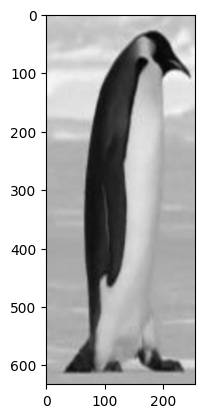

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sliding_window(image, step, window_size):
    # slide a window across the image
    for y in range(0, image.shape[0], step):
        for x in range(0, image.shape[1], step):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

def evaluate_window(window):
    return np.mean(window)

def evaluate_edges(window):
    edges = cv2.Canny(window, 50, 150)
    return np.sum(edges > 0)


def detect_subject(image_path, min_window_size=(30, 30), max_window_size=(200, 200), window_step=20, slide_step=10):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    _, thresholded = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)

    
    xo, yo, w, h = cv2.boundingRect(thresholded)

    
    cropped_image = image[yo:yo+h, xo:xo+w]
    w,h = image.shape
    max_window_size = (w,h)
    min_window_size = (w//3,h//3)
    window_step = min(w,h)//15

    
    edges = cv2.Canny(cropped_image, 50, 150)

    if image is None:
        print("Image not found.")
        return

    max_score = -1
    best_window = (0, 0)

    for width in range(min_window_size[0], max_window_size[0] + 1, window_step):
        for height in range(min_window_size[1], max_window_size[1] + 1, window_step):
            current_window_size = (width, height)
            
            for (x, y, window) in sliding_window(edges, slide_step, current_window_size):
                if window.shape[0] != current_window_size[1] or window.shape[1] != current_window_size[0]:
                    continue
                
                score = evaluate_window(window) + evaluate_edges(window)
                if score > max_score:
                    max_score = score
                    best_window = (x, y, width, height)

    # Draw the best window on the image
    #image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    #cv2.rectangle(cropped_image, (best_window[0], best_window[1]), (best_window[0] + best_window[2], best_window[1] + best_window[3]), (255, 0, 0), 2)
    
    x_win, y_win, width, height = best_window
    x_orig = x_win + xo
    y_orig = y_win + yo
    x1_orig = x_orig + width
    y1_orig = y_orig + height

    
    bbox = [x_orig, y_orig, x1_orig, y1_orig]

    c_image = image[y_orig:y1_orig, x_orig:x1_orig]

    plt.imshow(c_image, cmap='gray')

if __name__ == "__main__":
    detect_subject("1.jpg")
